In [3]:
%load_ext autoreload
%autoreload 2

import os
import sys

%store -r DISCO_ROOT_FOLDER
if "DISCO_ROOT_FOLDER" in globals():
    os.chdir(DISCO_ROOT_FOLDER)
    sys.path.append(DISCO_ROOT_FOLDER)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import numpy as np

def load_syn(noise):
    D = np.load(f"datasets/synth/synth_100_{noise:.2}.npy")
    X, l = D[:, :-1], D[:, -1]
    return X, l

n_noise = np.round(np.arange(0, 1.01, 0.1), 1)
synth_noise_datasets = [[load_syn(noise)] for noise in n_noise]

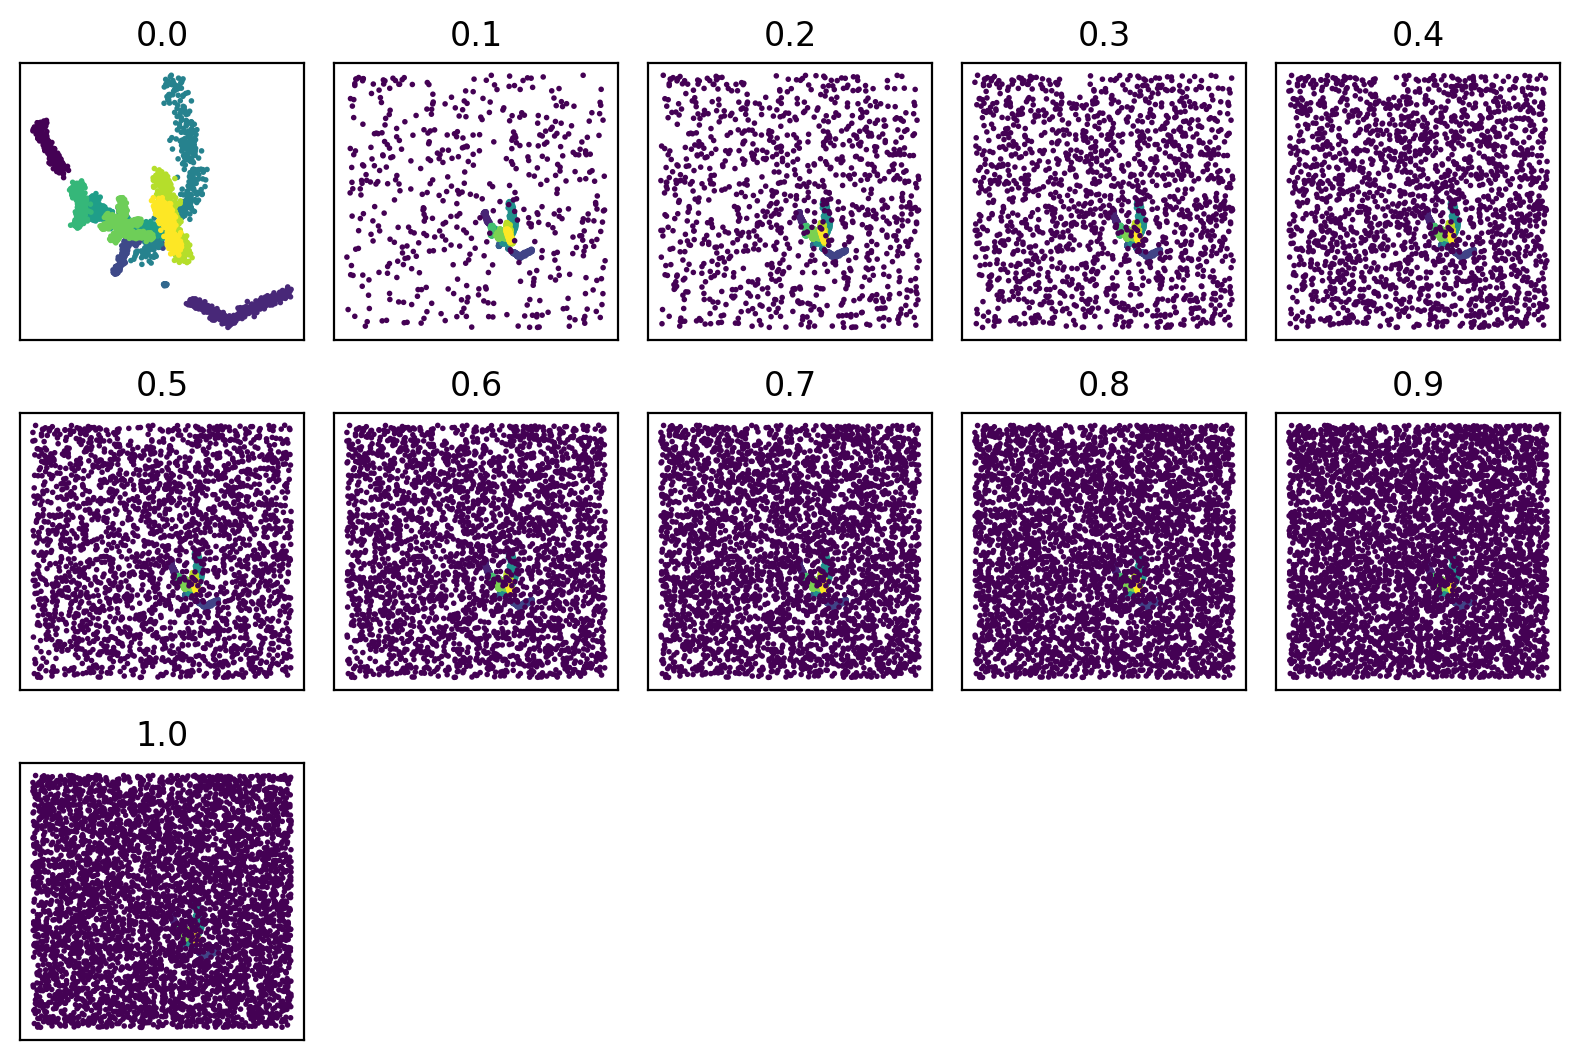

In [12]:
import matplotlib.pyplot as plt
from src.utils.plots import plot_datasets

plot_datasets(synth_noise_datasets, n_noise, n_cols=5, figsize=1.6)
plt.savefig("imgs/Synth_noise_data.png")

In [ ]:
from src.utils.experiments import cache, calc_eval_measures_for_multiple_datasets
from src.utils.metrics import create_and_rescale_df


eval_results = cache(
    "Synth_noise",
    calc_eval_measures_for_multiple_datasets,
    [synth_noise_datasets, n_noise],
    recalc=False,
)

df = create_and_rescale_df(eval_results)

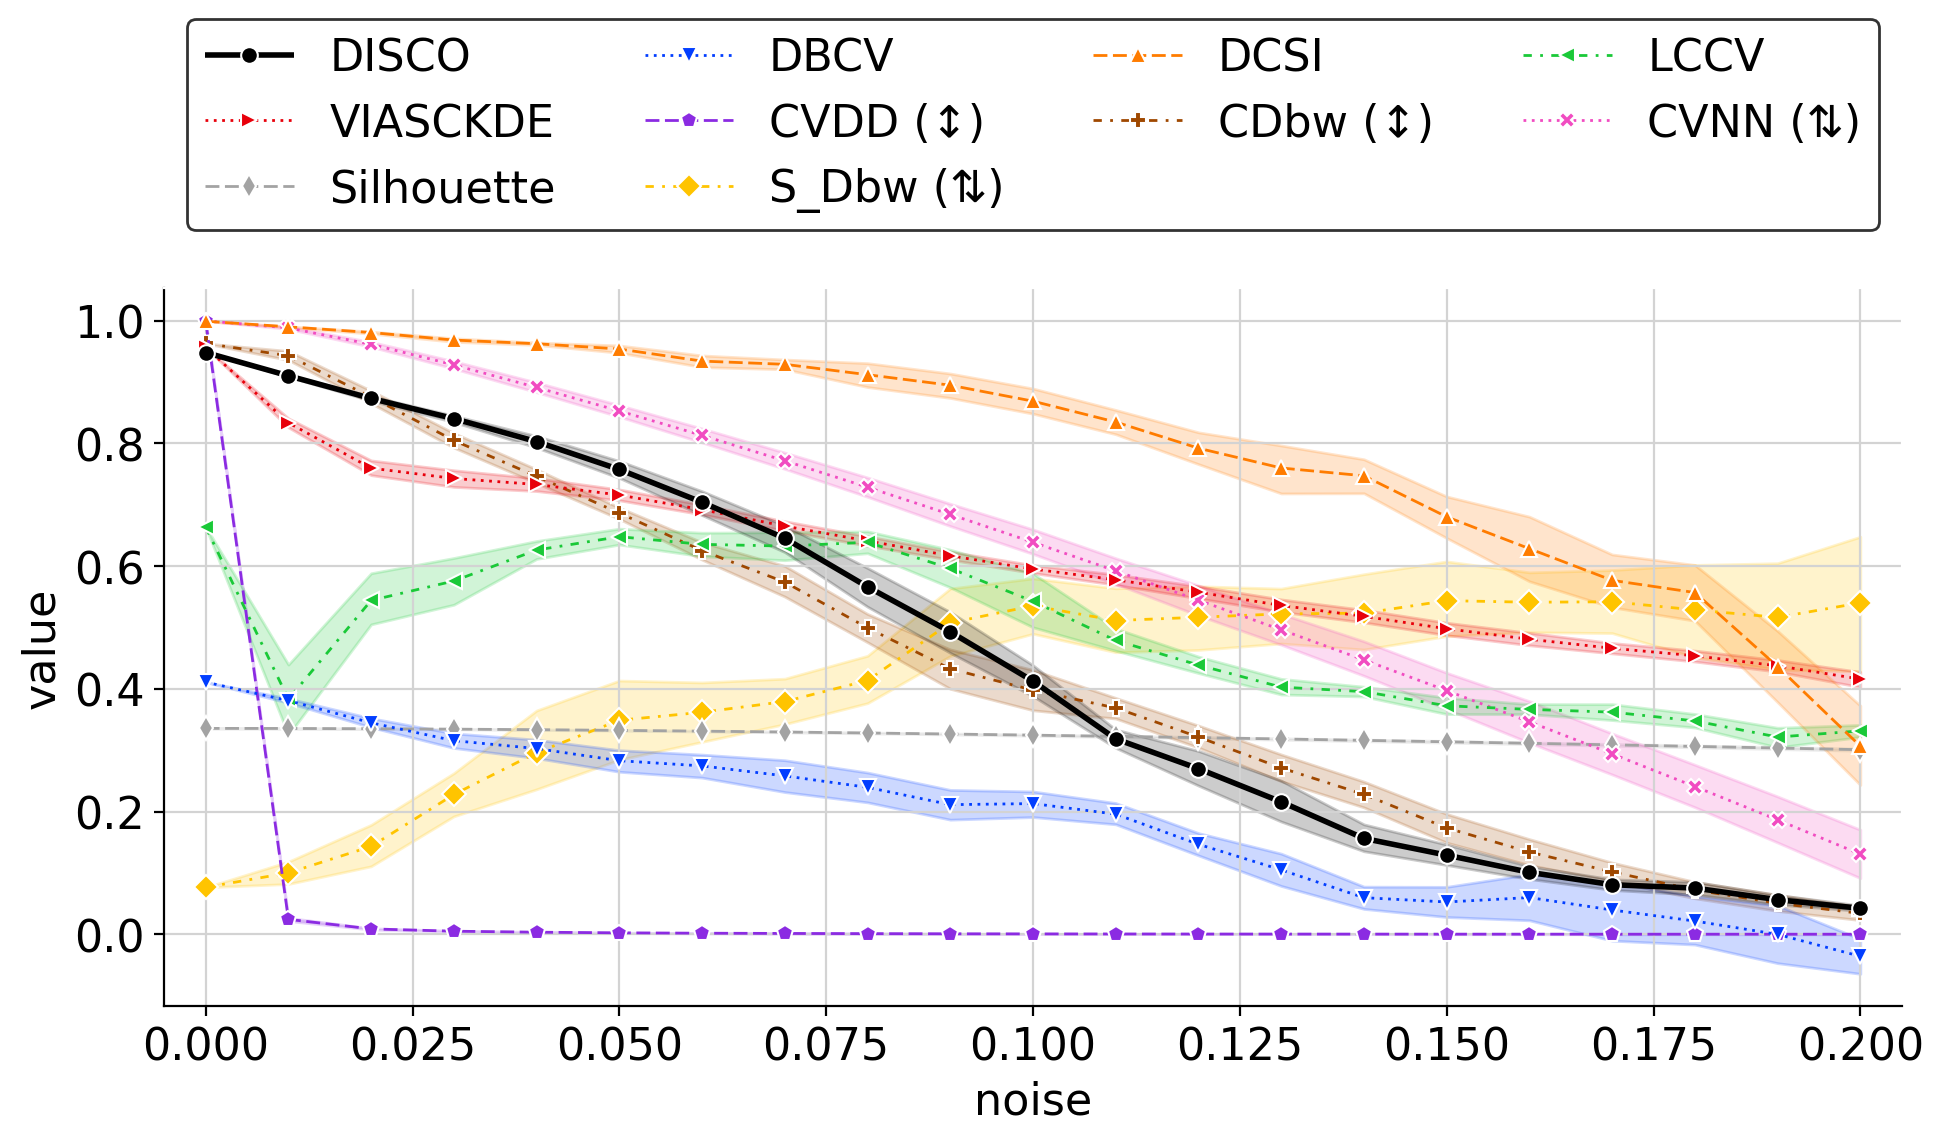

In [ ]:
from src.utils.plots import plot_lineplot

eps = 0.1
x_range = n_noise[0] - eps, n_noise[-1] + eps
df = df.rename(columns={"dataset": "noise"})

plot_lineplot(df, "noise", "value", "measure", x_range=x_range, y_range=(None, None))
plt.savefig("imgs/Synth_noise.png")

In [ ]:
import pandas as pd
from src.utils.metrics import DISCO

from src.utils.experiments import cache, calc_eval_measures_for_multiple_datasets


min_points_list = range(1, 31, 2)

MIN_POINTS_DISCO = {
    min_points: lambda X, l, min_points=min_points: DISCO(X, l, min_points=min_points)
    for min_points in min_points_list
}

eval_results = cache(
    "Synth_noise_DISCO_min_points",
    calc_eval_measures_for_multiple_datasets,
    [synth_noise_datasets, n_noise],
    {"metrics": MIN_POINTS_DISCO},
    recalc=False,
)

df = pd.DataFrame(data=eval_results)

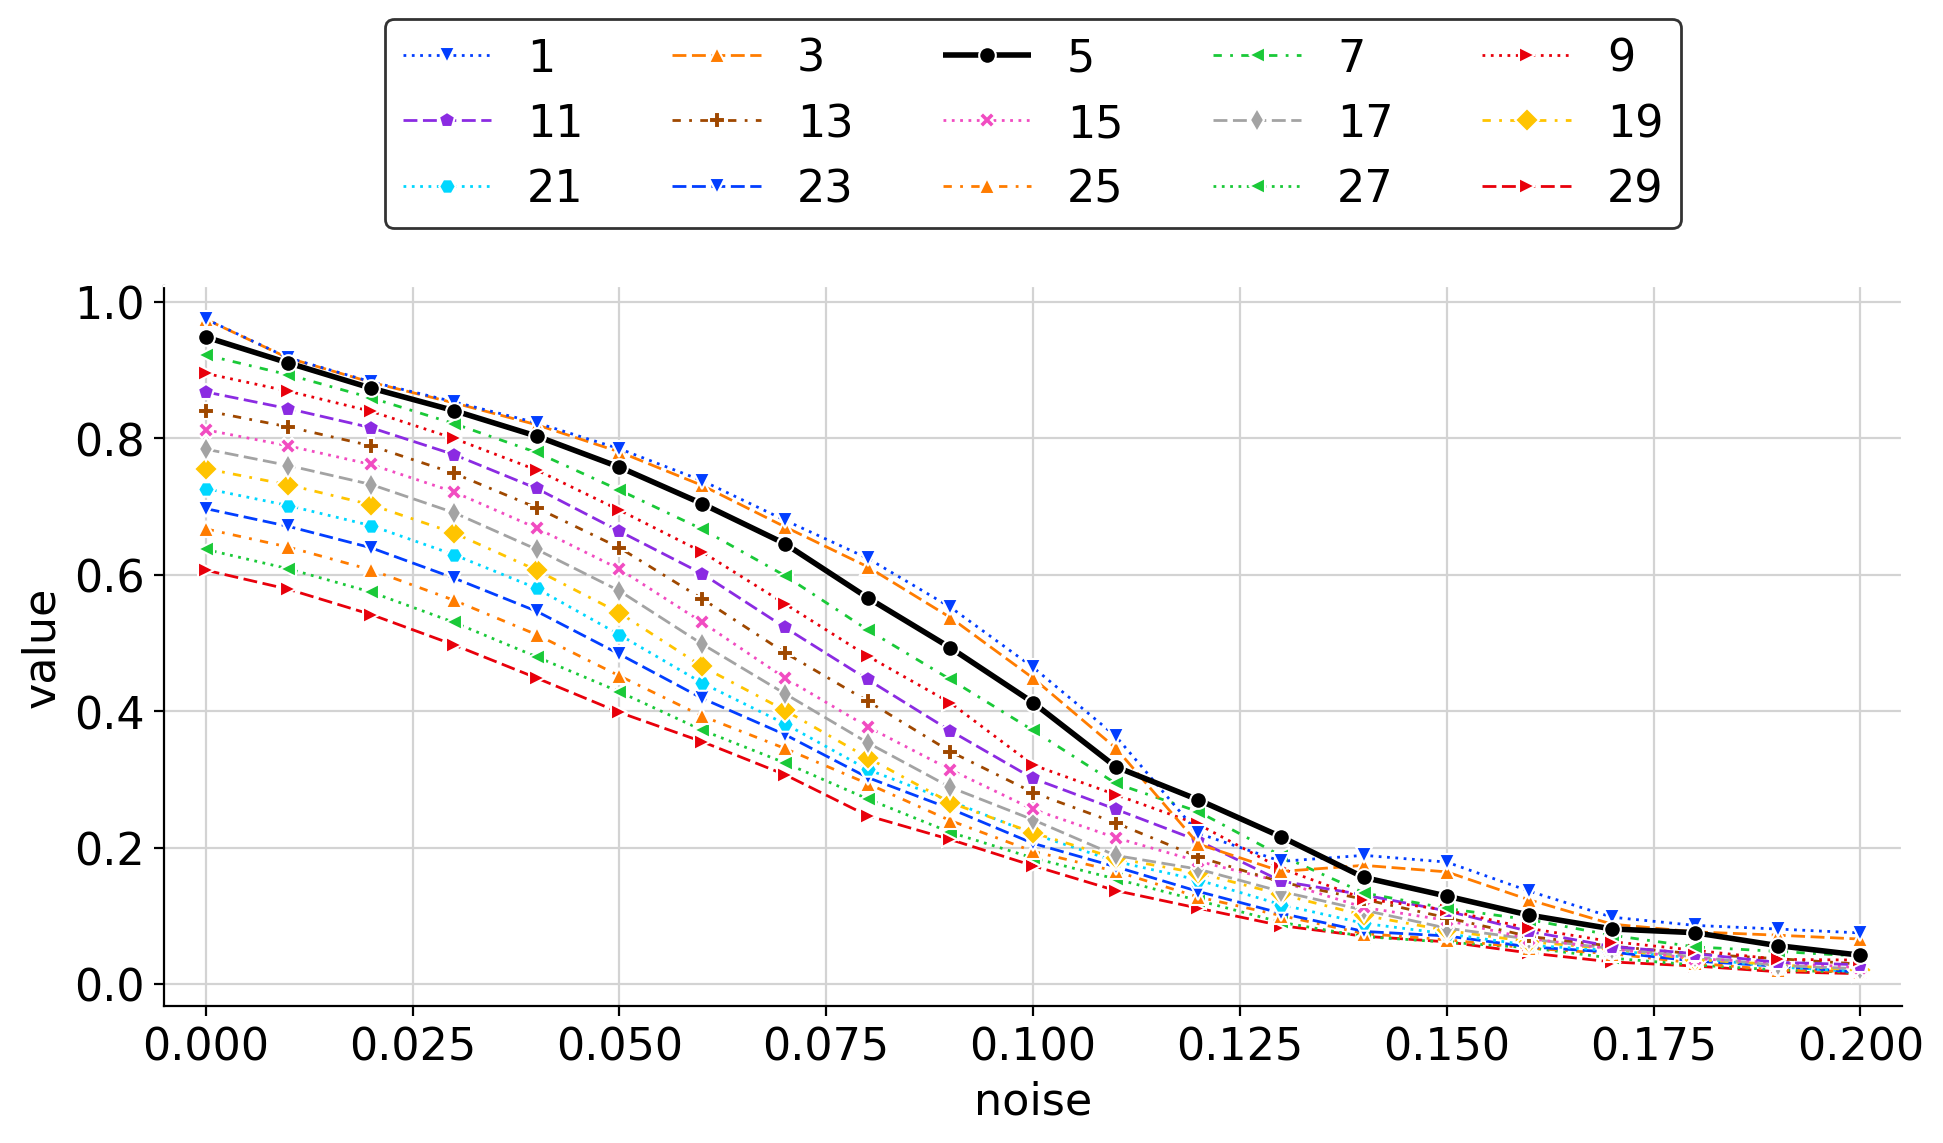

In [ ]:
from src.utils.plots import plot_lineplot

eps = 0.1
x_range = n_noise[0] - eps, n_noise[-1] + eps
df = df.rename(columns={"dataset": "noise"})

plot_lineplot(df, "noise", "value", "measure", x_range=x_range, y_range=(None, None), highlight=3, errorbar=None, order=None, ncol=5)
plt.savefig("imgs/Synth_noise_DISCO_min_points.png")